# Micro Credit Defaulter

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None) #so that large dataframes can be seen in output wholely
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading dataset from local
df = pd.read_csv(r'D:\OneDrive - eClinicalWorks\Documents\Perspnal\Kaggle datasets\Credit_data_file.csv' , index_col= 0)

In [3]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209593 entries, 1 to 209593
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [5]:
df.shape

(209593, 36)

## EDA

Checking the Distribution for all the numerical variables

In [6]:
df1 = df.copy()

In [7]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


As we can see 75% and max value shows huge diff

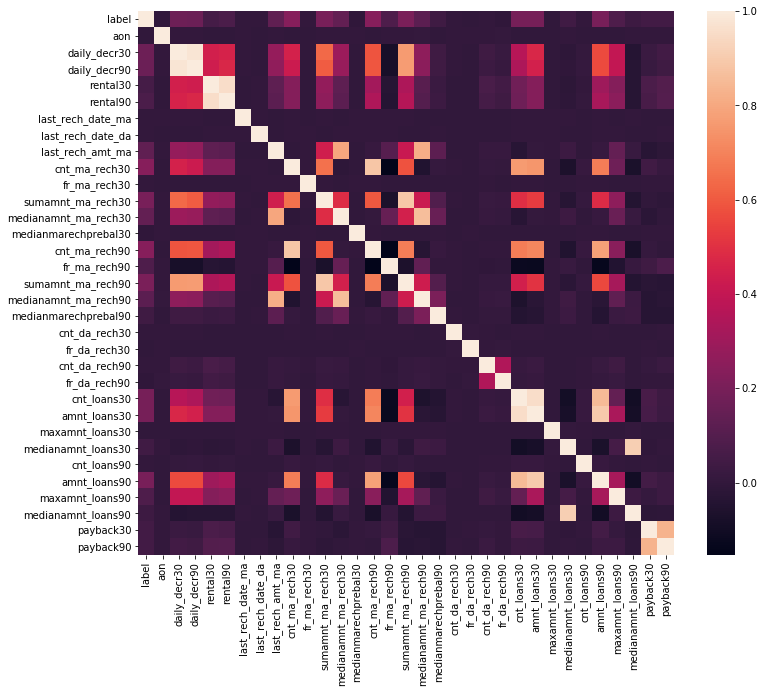

In [8]:
# plotting the correrelation
plt.figure(figsize=(12,10))
sns.heatmap(df.corr())

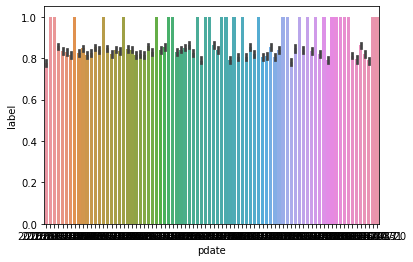

In [9]:
sns.barplot(x='pdate',y='label',data=df)

Grouping the features on the basis of Balance, frequency of recharge , amount of laon taken and plotting them to compare with the payback rate within 5 years

In [10]:
num_var = df.select_dtypes(exclude = 'object')

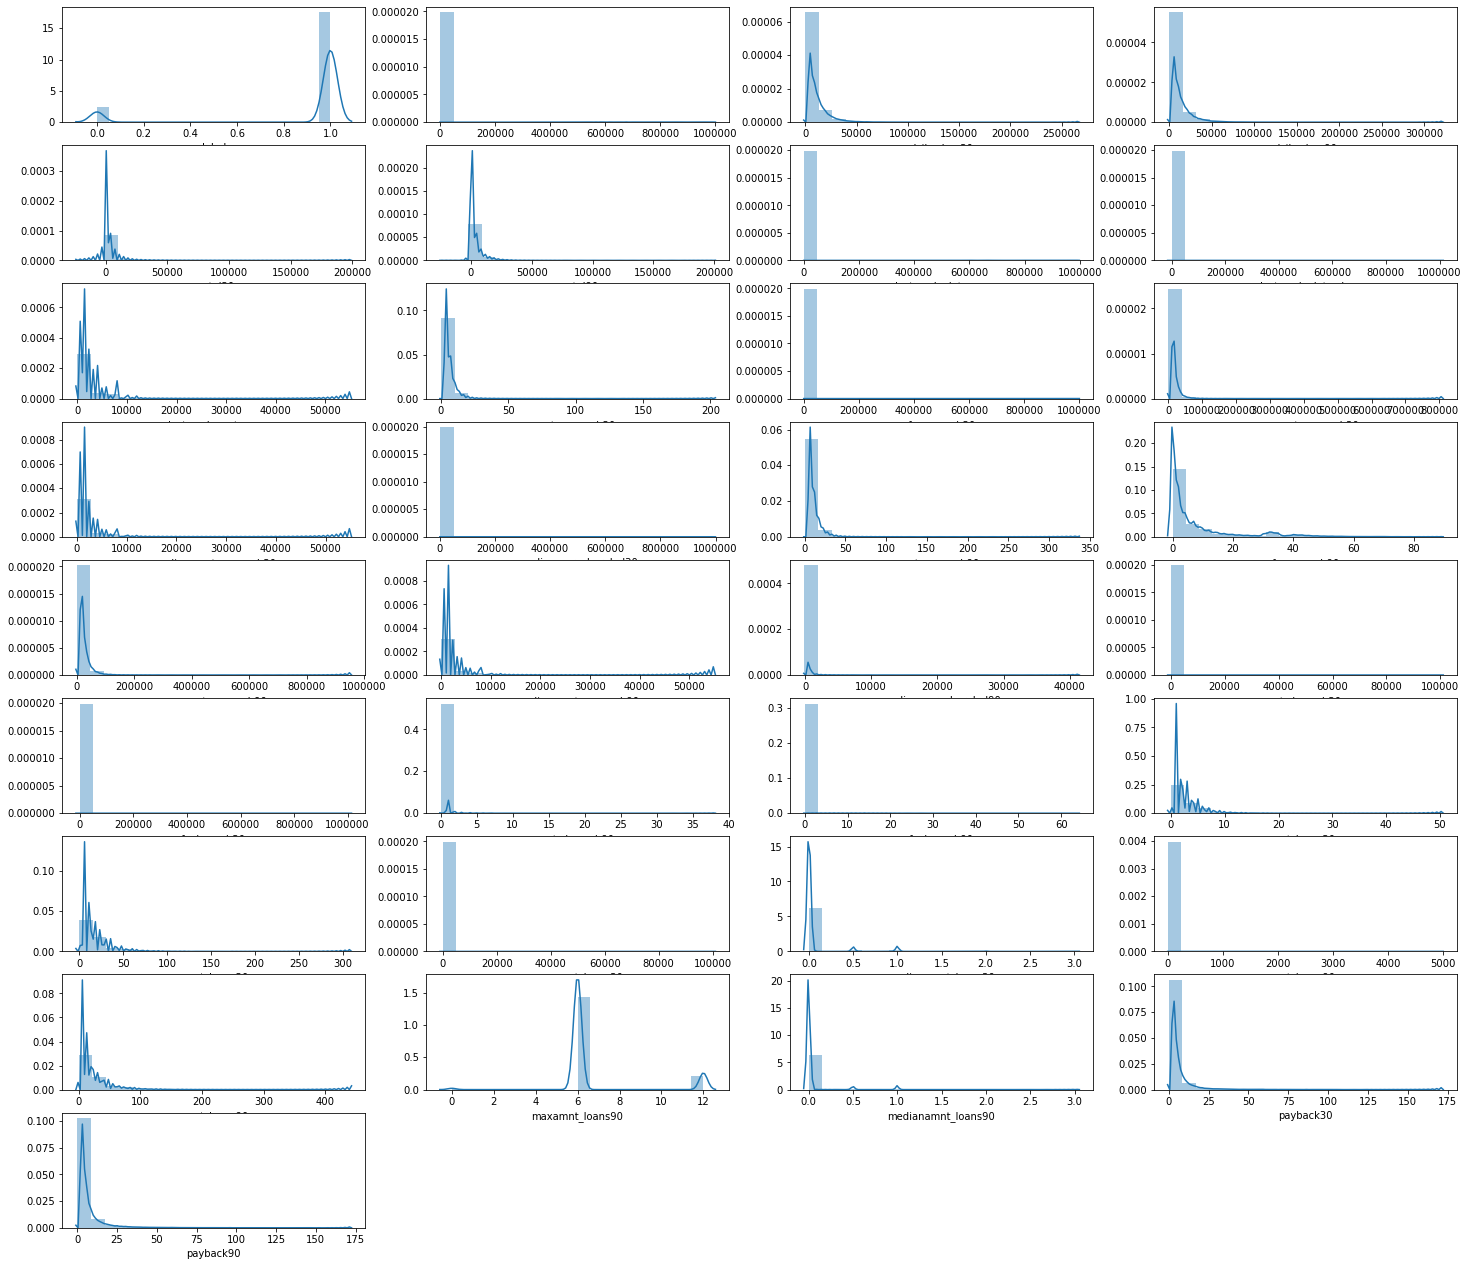

In [11]:
# checking the disribution of each feature
plt.figure(figsize=(25,25))       
for i,var in enumerate(num_var):
    plt.subplot(10,4,i+1)
    sns.distplot(df[var], bins=20)

As we can see the most of the data is skewed 

In [13]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [14]:
lst = [df1]
for column in lst:
    column.loc[column["rental30"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["rental30"] > 0) & (column["rental30"] <= 19766), 'balance_group'] = 'low balance'
    column.loc[(column["rental30"] > 19766) & (column["rental30"] <= 118572), 'balance_group'] = 'average balance'
    column.loc[(column["rental30"] > 118572), 'balance_group'] = 'high balance'

In [15]:
count_balance_response_pct = pd.crosstab(df1['label'],df1['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

In [16]:
bal = pd.DataFrame(df1['balance_group'].value_counts())
bal['% Subscription'] = count_balance_response_pct[1]
bal.drop('balance_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)

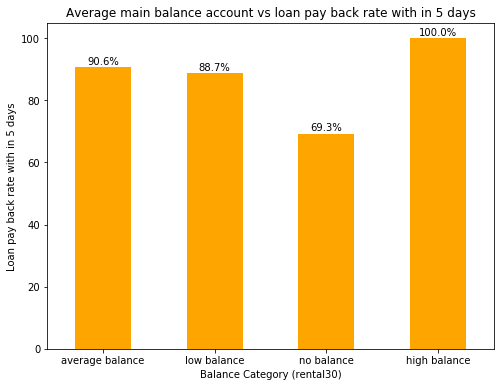

In [17]:
plot_balance = bal['% Subscription'].plot(kind = 'bar',color = ('orange'), figsize = (8,6))

plt.title('Average main balance account vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Balance Category (rental30)')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      bal['% Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

From the above plot we can see that people with low balance and no balance are the major defaulters in paying back the loan in 5 days 

In [18]:
lst = [df1]
for column in lst:
    column.loc[column["fr_ma_rech30"] <=0,  'frequency_group'] = 'no frequency'
    column.loc[(column['fr_ma_rech30'] > 0) & (column['fr_ma_rech30'] <=1 ), 'frequency_group'] = 'low frequency'
    column.loc[(column['fr_ma_rech30'] >1) & (column['fr_ma_rech30'] <=2), 'frequency_group'] = 'medium frequency'
    column.loc[(column['fr_ma_rech30'] >2), 'frequency_group'] = 'high frequency'

In [19]:
count_fre_response_pct = pd.crosstab(df1['label'],df1['frequency_group']).apply(lambda x: x/x.sum() * 100)
count_fre_response_pct = count_fre_response_pct.transpose()

In [20]:
fre = pd.DataFrame(df1['frequency_group'].value_counts())
fre['% Subscription'] = count_fre_response_pct[1]
fre.drop('frequency_group',axis = 1,inplace = True)
fre['fre'] = [1,2,0,3]
fre= fre.sort_values('fre',ascending = True)

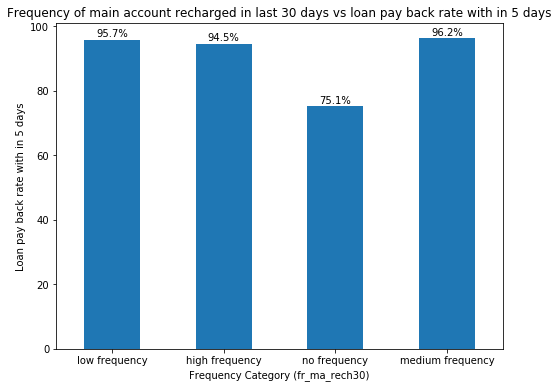

In [21]:
plot_fre = fre['% Subscription'].plot(kind = 'bar',figsize = (8,6))

plt.title('Frequency of main account recharged in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Frequency Category (fr_ma_rech30)')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_fre.patches,
                      fre['% Subscription'].round(1).astype(str)):
    plot_fre.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

As we can see above that people who are not recharging their balance are the major defaulters in the paying back

In [22]:
lst = [df1]
for column in lst:
    column.loc[column["cnt_loans30"] <=0,  'loan_frequency_group'] = 'no loans'
    column.loc[(column['cnt_loans30'] > 0) & (column['cnt_loans30'] <=1 ), 'loan_frequency_group'] = 'low num of loans'
    column.loc[(column['cnt_loans30'] >1) & (column['cnt_loans30'] <=4), 'loan_frequency_group'] = 'medium num of loans'
    column.loc[(column['cnt_loans30'] >4), 'loan_frequency_group'] = 'high num of loans'

In [23]:
count_loan_response_pct = pd.crosstab(df1['label'],df1['loan_frequency_group']).apply(lambda x: x/x.sum() * 100)
count_loan_response_pct = count_loan_response_pct.transpose()

In [24]:
fre = pd.DataFrame(df1['loan_frequency_group'].value_counts())
fre['% Subscription'] = count_loan_response_pct[1]
fre.drop('loan_frequency_group',axis = 1,inplace = True)

fre['fre'] = [1,2,0,3]
fre= fre.sort_values('fre',ascending = True)

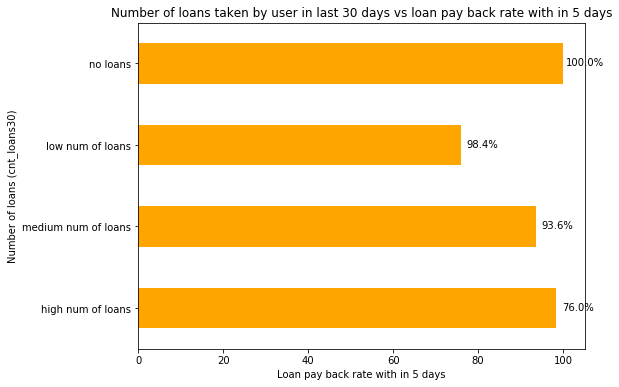

In [25]:
plot_fre = fre['% Subscription'].plot(kind = 'barh',color = ('orange'),figsize = (8,6))                                            

plt.title('Number of loans taken by user in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Number of loans (cnt_loans30)')
plt.xlabel('Loan pay back rate with in 5 days')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_fre.patches,
                      fre['% Subscription'].round(1).sort_values(ascending = True).round(1).astype(str)):
    plot_fre.text(rec.get_width()+5, 
                  rec.get_y()+ rec.get_height()-0.3, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

As we can see from above that people with high number of loans tend to have lowest payback rate

In [26]:
df1.drop(['msisdn', 'pcircle', 'pdate','balance_group','frequency_group','loan_frequency_group'],axis=1,inplace=True)

In [27]:
df1.shape

(209593, 33)

In [28]:
df2 = df1.copy()

In [29]:
# Dropping the highly corerelated features
df2.drop(['last_rech_date_da','fr_da_rech30','maxamnt_loans30','medianamnt_loans30','maxamnt_loans90','medianamnt_loans90','cnt_da_rech30','cnt_da_rech90','fr_da_rech90'],axis=1,inplace=True)

In [30]:
# function to create histogram, Q-Q plot and boxplot

# for Q-Q plots
import scipy.stats as stats

def diagnostic_plots(df2, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

******* label *******


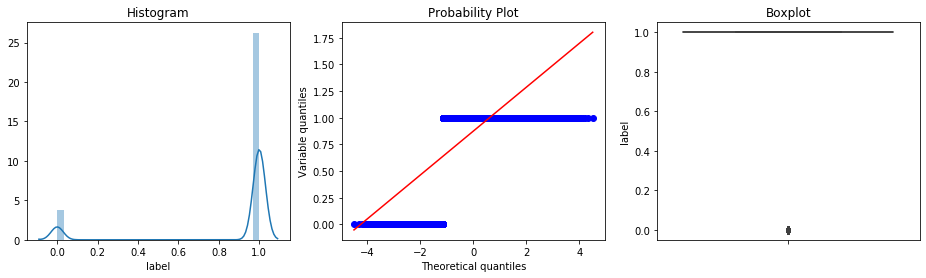

******* aon *******


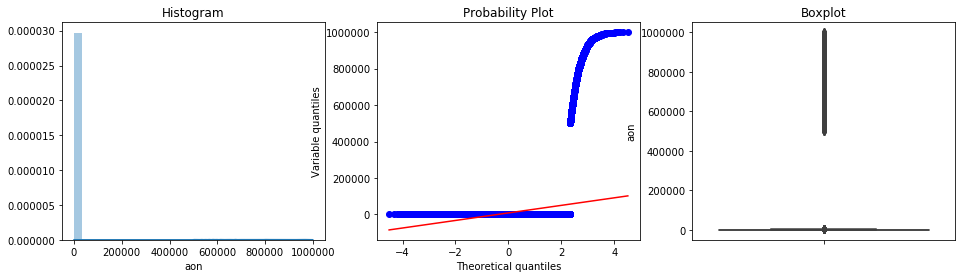

******* daily_decr30 *******


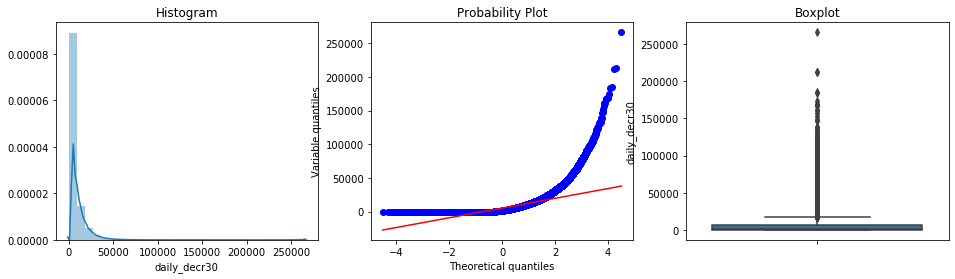

******* daily_decr90 *******


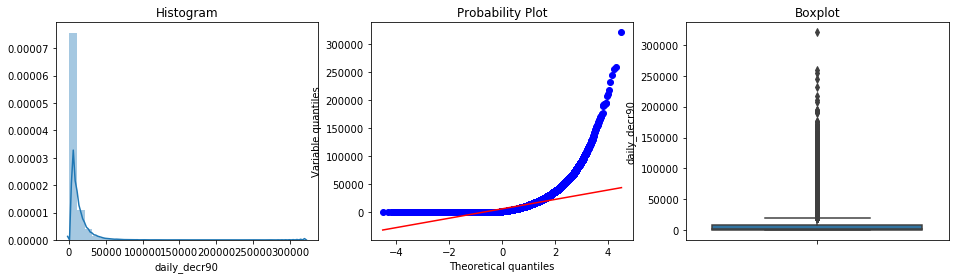

******* rental30 *******


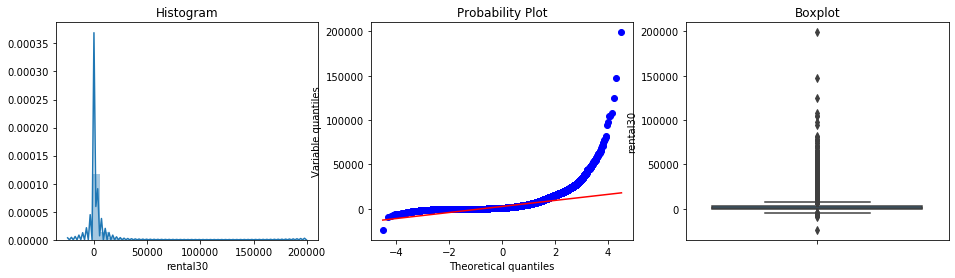

******* rental90 *******


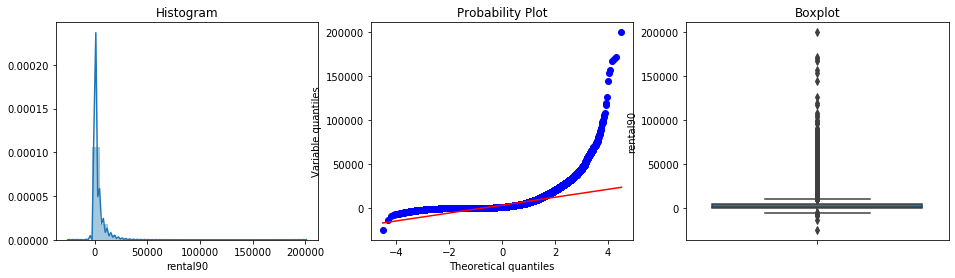

******* last_rech_date_ma *******


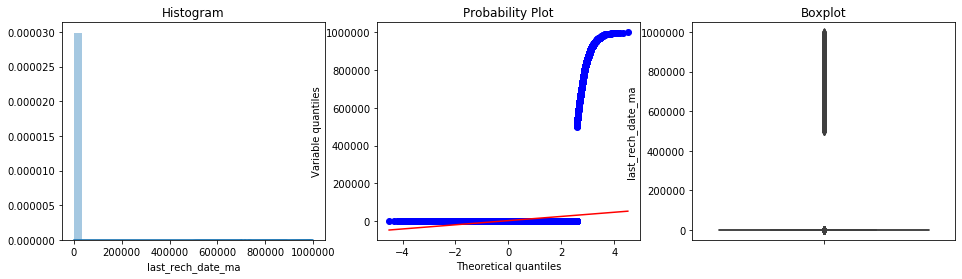

******* last_rech_date_da *******


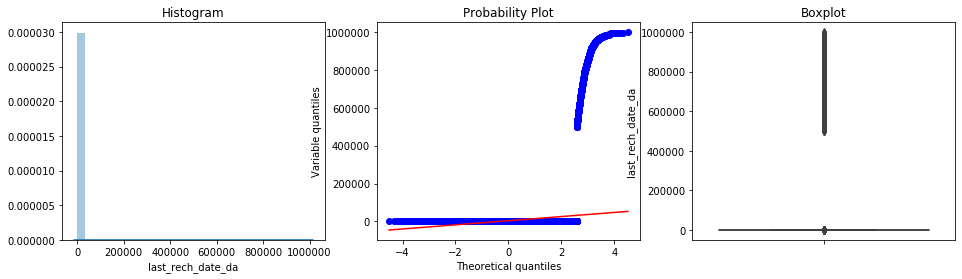

******* last_rech_amt_ma *******


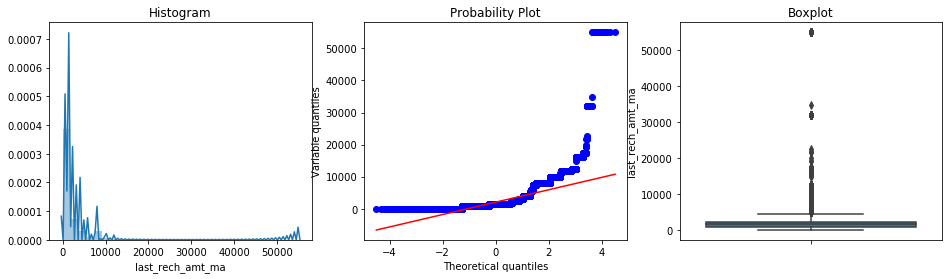

******* cnt_ma_rech30 *******


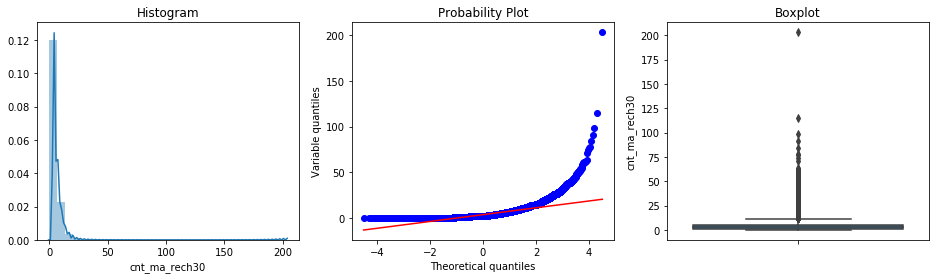

******* fr_ma_rech30 *******


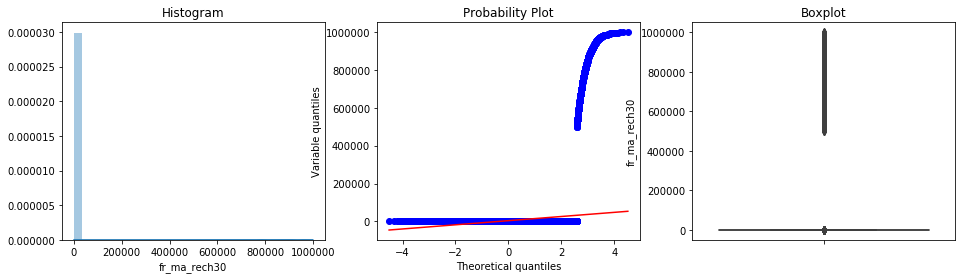

******* sumamnt_ma_rech30 *******


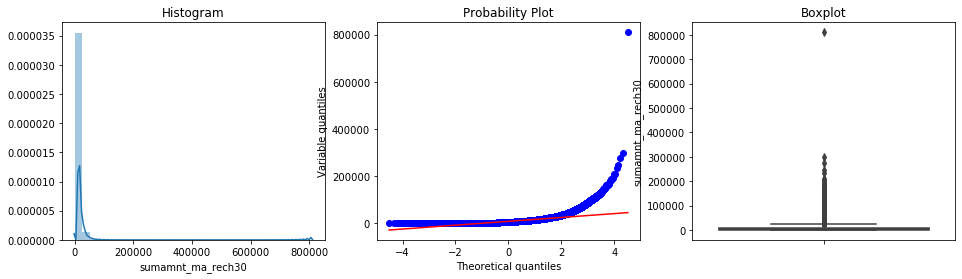

******* medianamnt_ma_rech30 *******


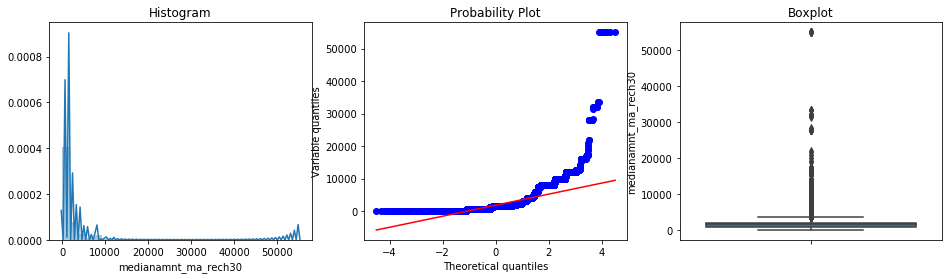

******* medianmarechprebal30 *******


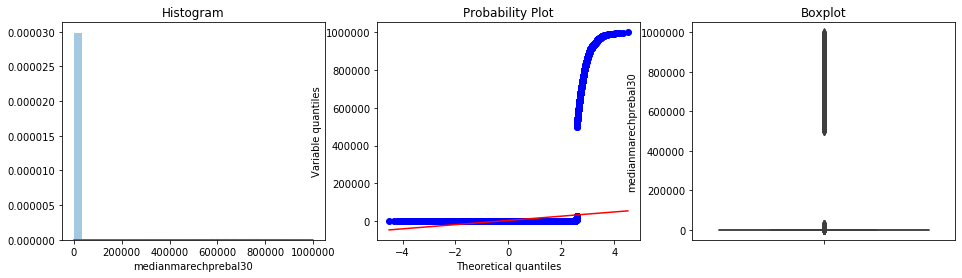

******* cnt_ma_rech90 *******


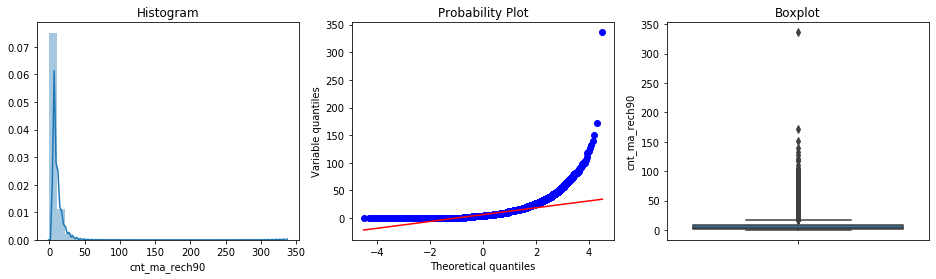

******* fr_ma_rech90 *******


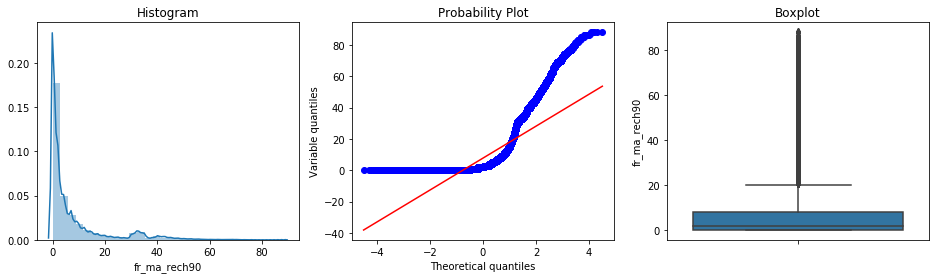

******* sumamnt_ma_rech90 *******


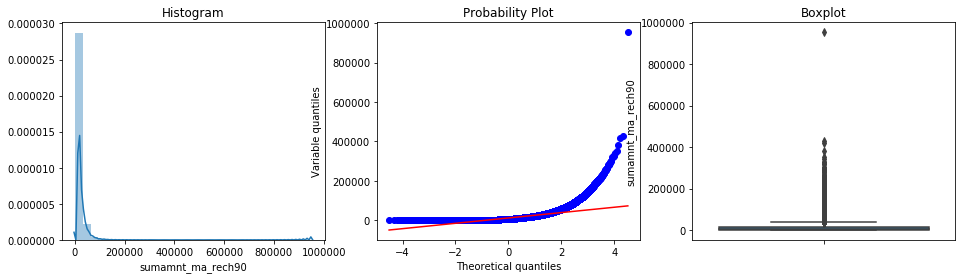

******* medianamnt_ma_rech90 *******


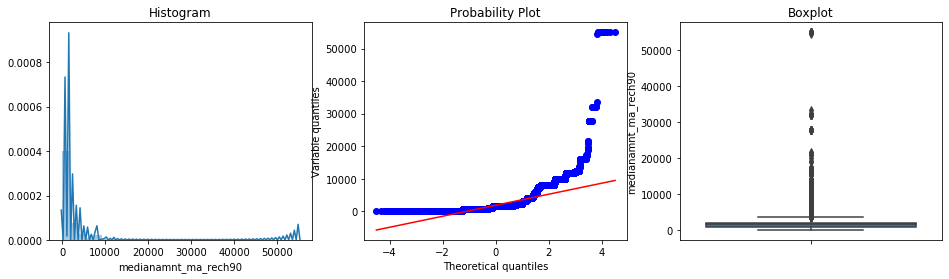

******* medianmarechprebal90 *******


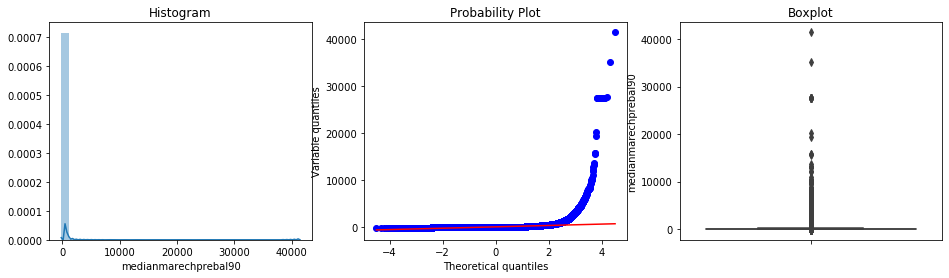

******* cnt_da_rech30 *******


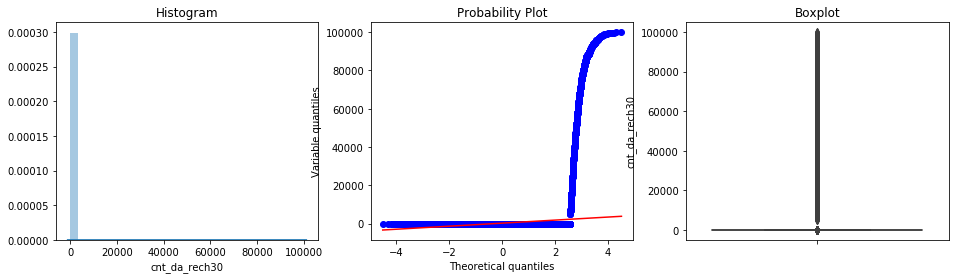

******* fr_da_rech30 *******


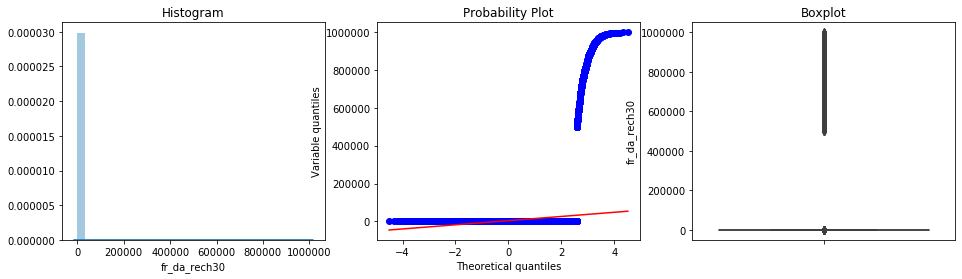

******* cnt_da_rech90 *******


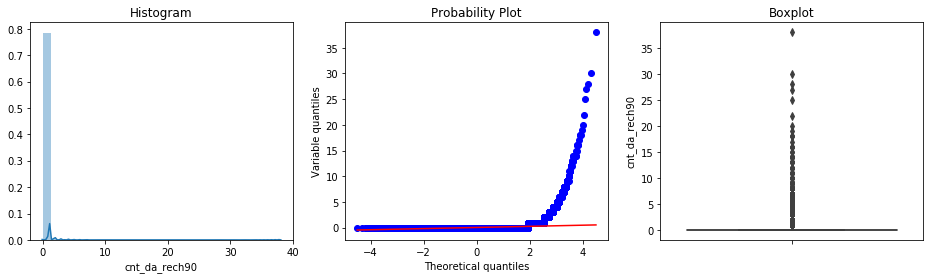

******* fr_da_rech90 *******


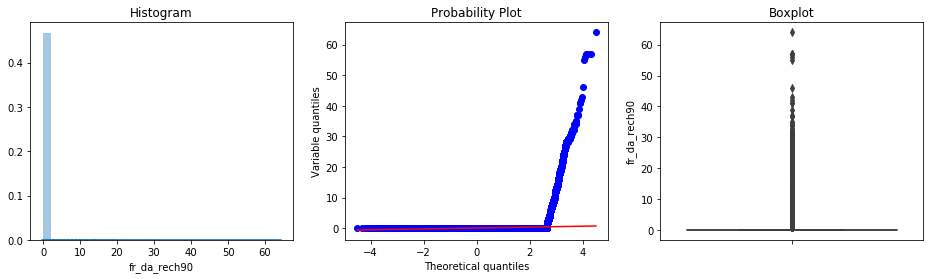

******* cnt_loans30 *******


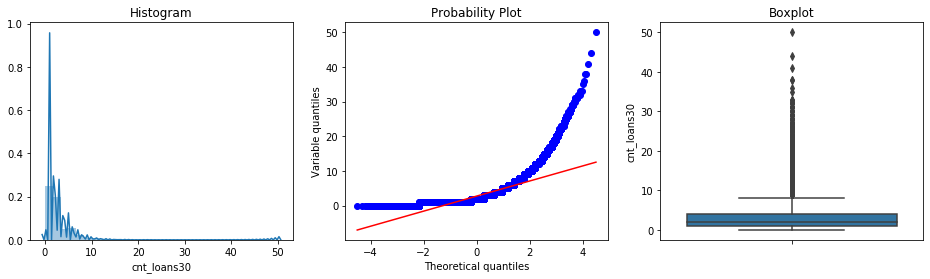

******* amnt_loans30 *******


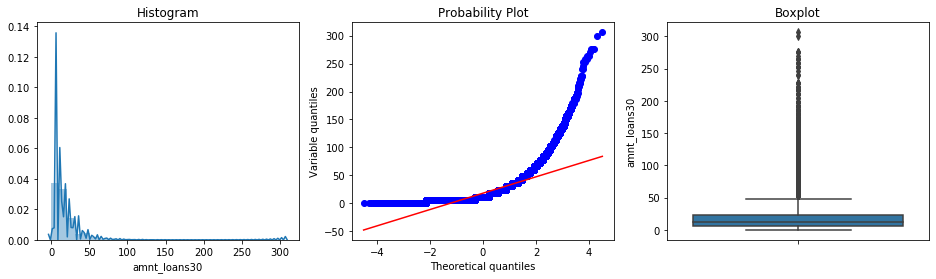

******* maxamnt_loans30 *******


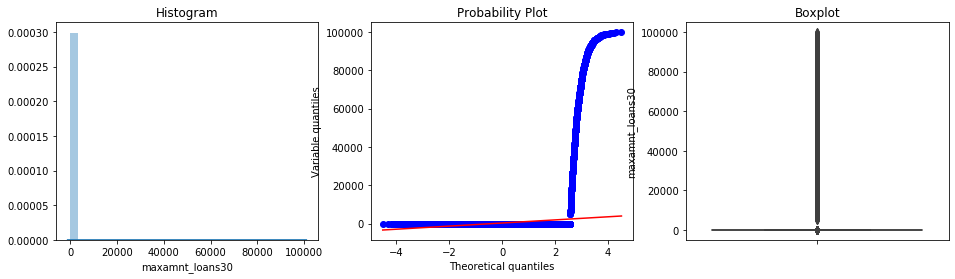

******* medianamnt_loans30 *******


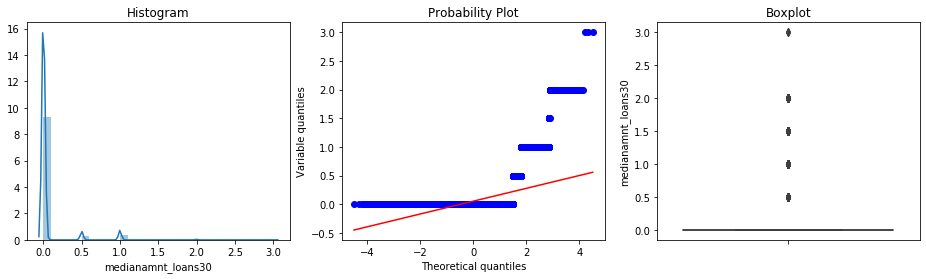

******* cnt_loans90 *******


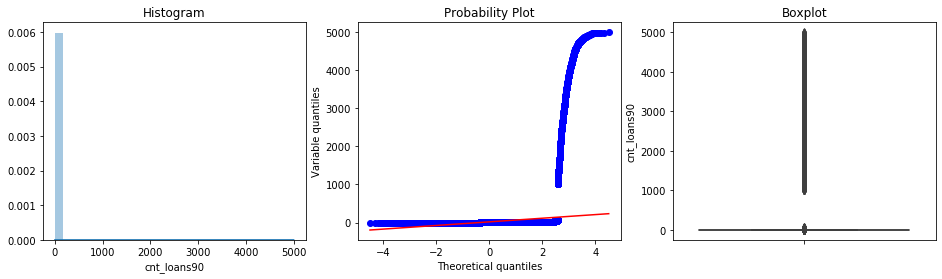

******* amnt_loans90 *******


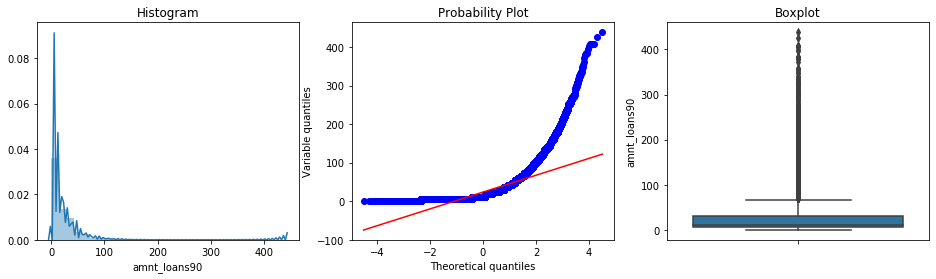

******* maxamnt_loans90 *******


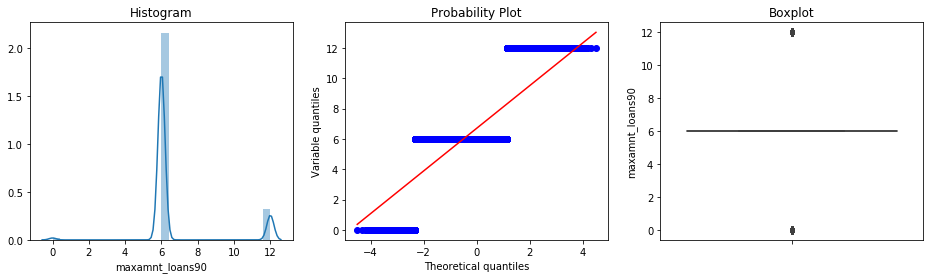

******* medianamnt_loans90 *******


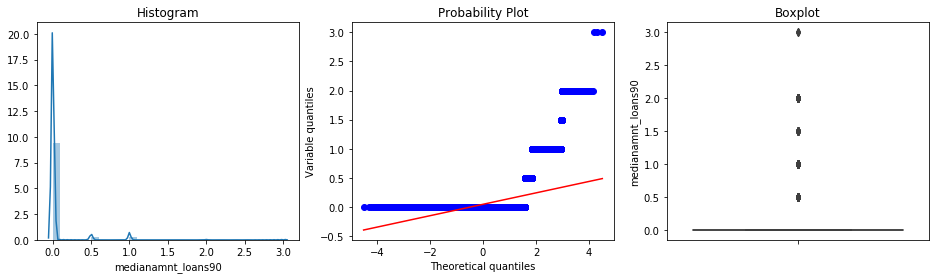

******* payback30 *******


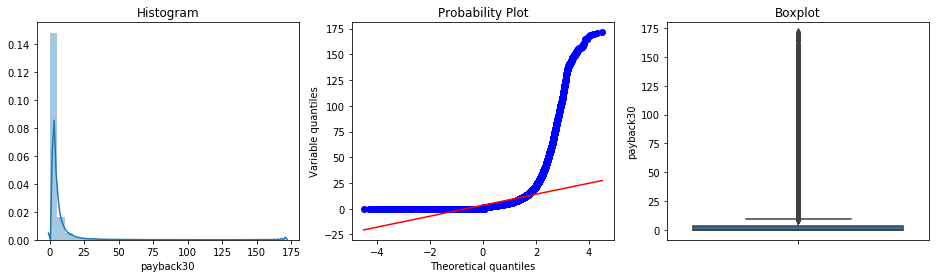

******* payback90 *******


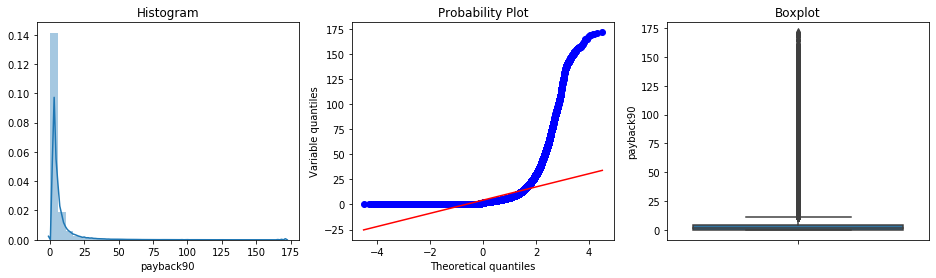

In [31]:
#  Checking the outliers
for var in num_var:
  print("******* {} *******".format(var))
  diagnostic_plots(df2, var)

  # here we observe outlier using histogram,, qq plot and boxplot

In [32]:
df2.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,cnt_loans90,amnt_loans90,payback30,payback90
1,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,1539,2,21.0,...,21,3078,1539.0,7.50,2,12,2.0,12,29.000000,29.000000
2,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,5787,1,0.0,...,0,5787,5787.0,61.04,1,12,1.0,12,0.000000,0.000000
3,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539,1,0.0,...,0,1539,1539.0,66.32,1,6,1.0,6,0.000000,0.000000
4,1,241.0,21.228000,21.228000,159.42,159.42,41.0,947,0,0.0,...,0,947,947.0,2.50,2,12,2.0,12,0.000000,0.000000
5,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309,7,2.0,...,2,23496,2888.0,35.00,7,42,7.0,42,2.333333,2.333333


In [33]:
df_drop = df2.copy()

In [34]:
from scipy.stats import zscore
z_scores = stats.zscore(df_drop)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)

df_drop = df_drop[filtered_entries]

In [35]:
df2.shape

(209593, 24)

In [36]:
df_drop.shape

(173608, 24)

In [37]:
cols =  df2.columns

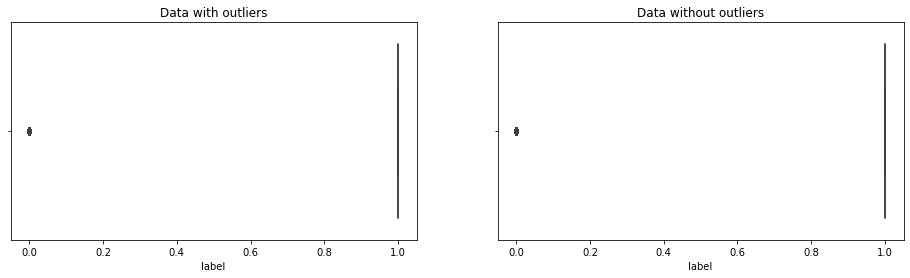

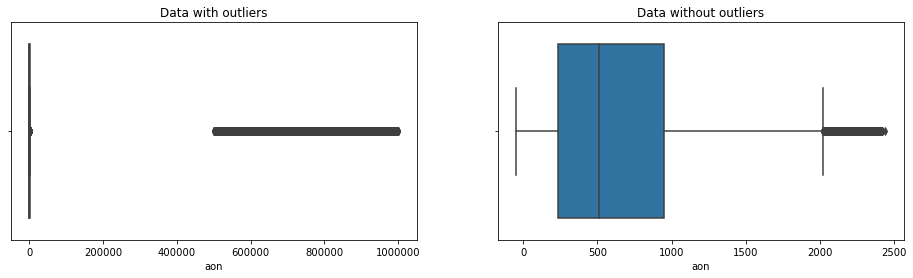

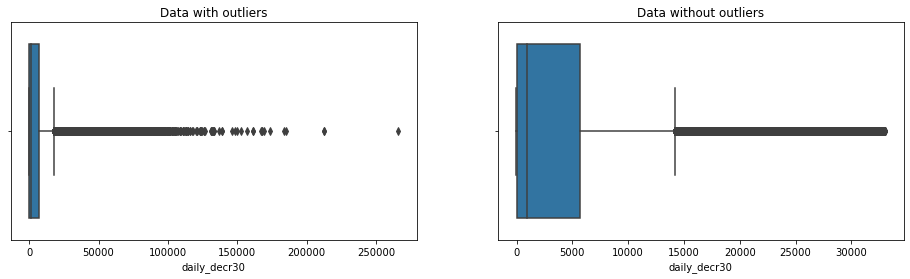

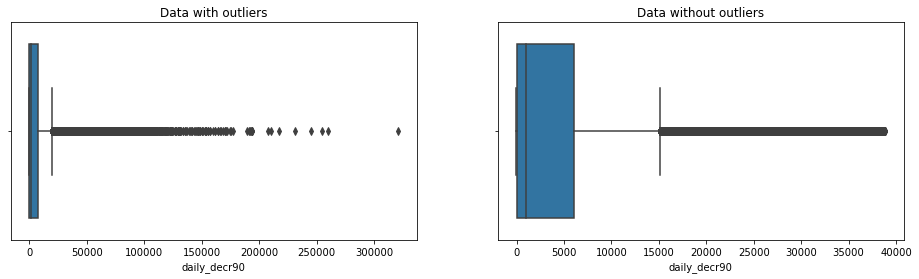

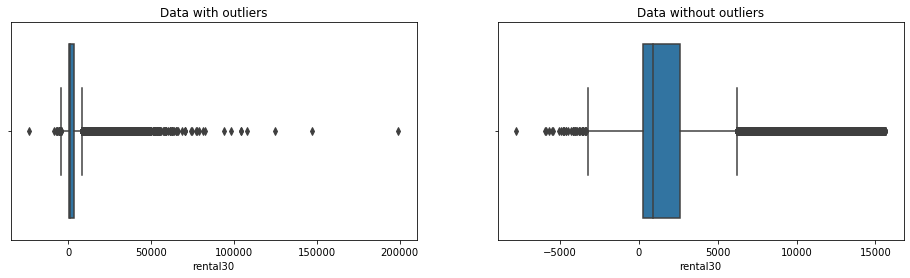

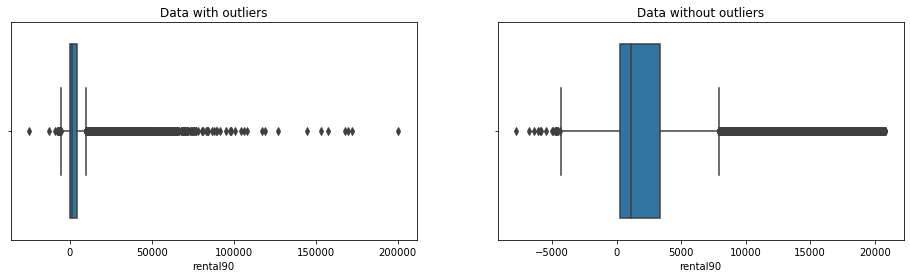

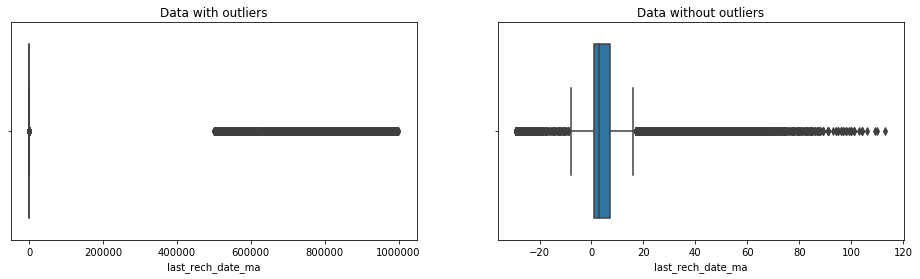

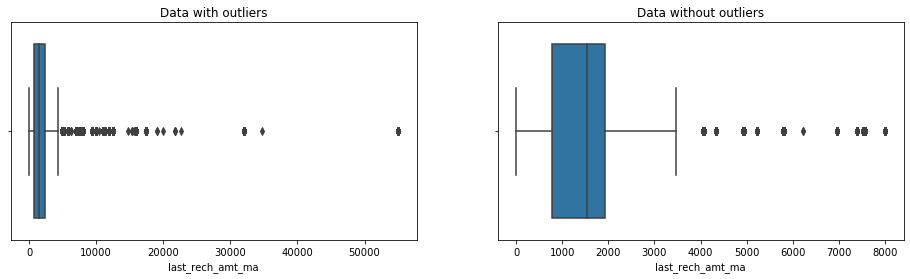

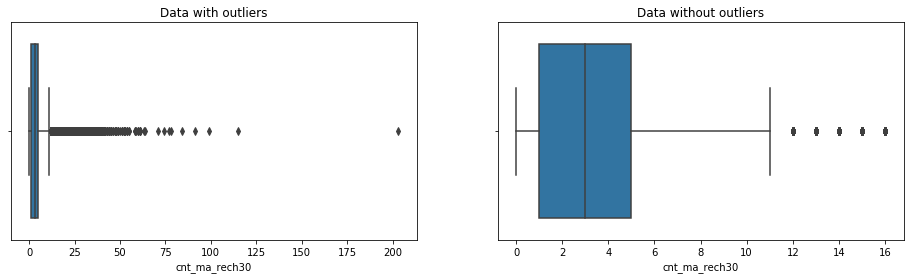

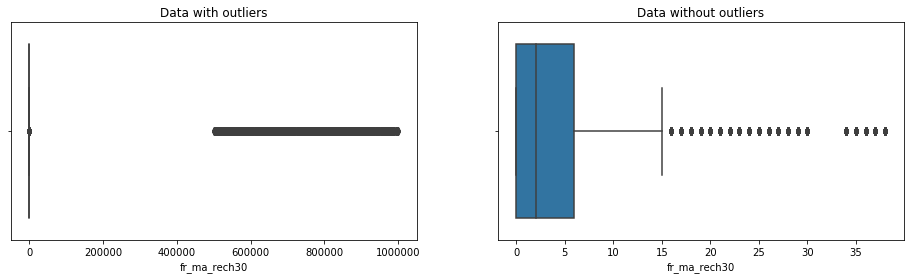

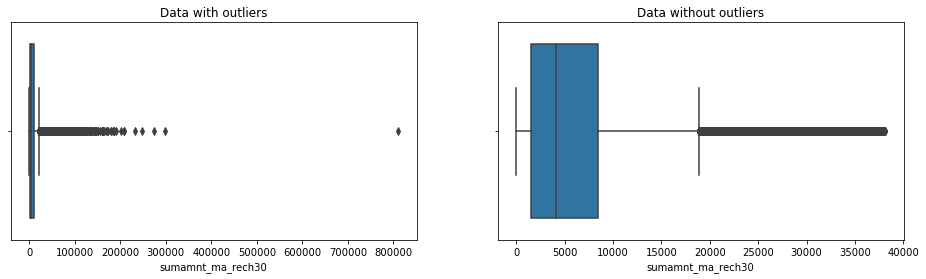

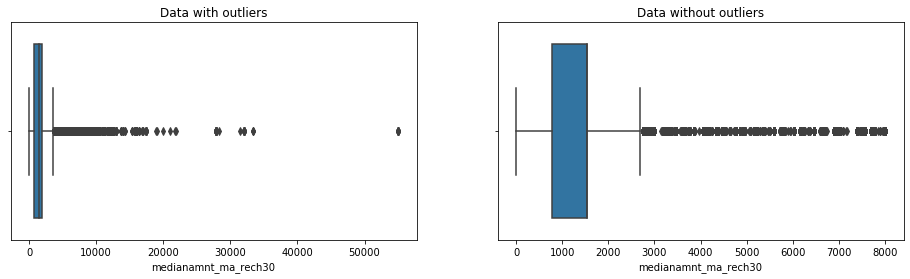

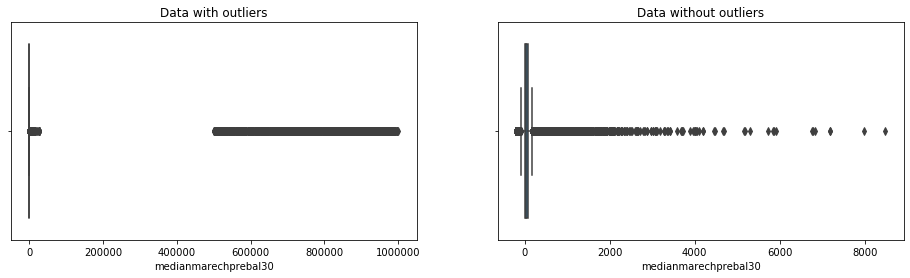

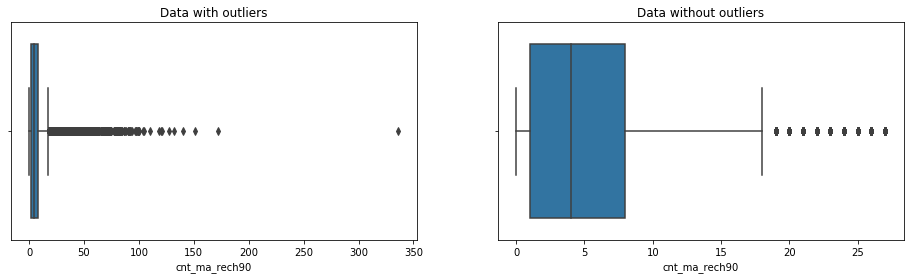

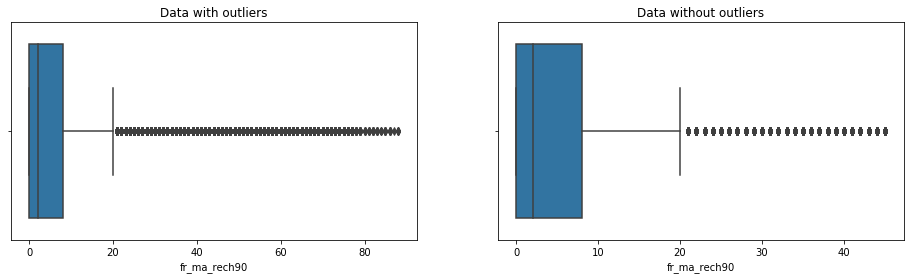

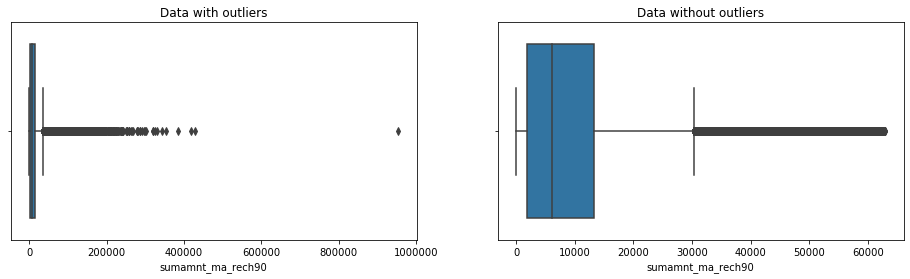

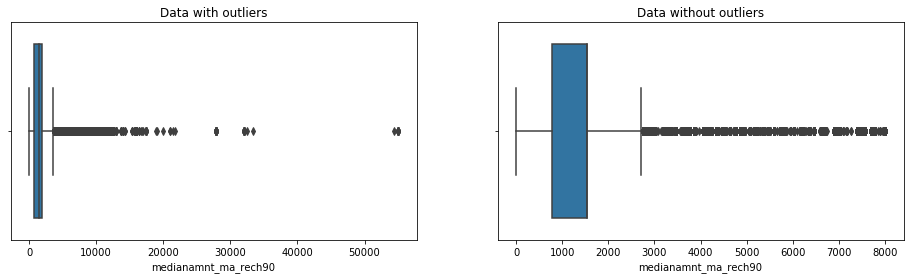

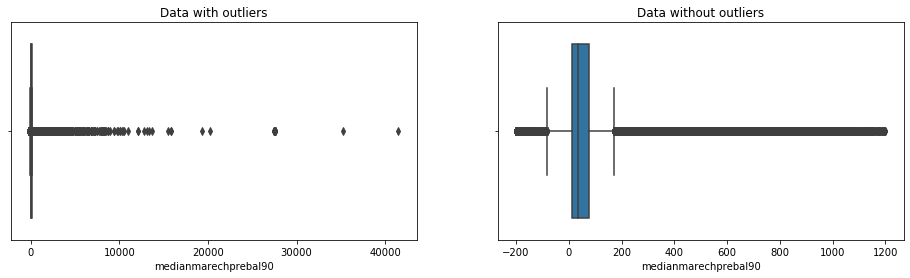

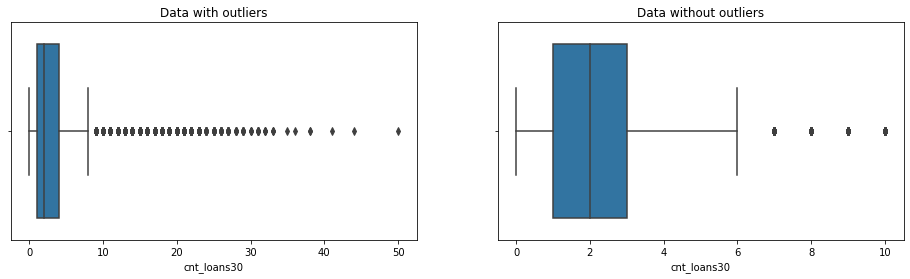

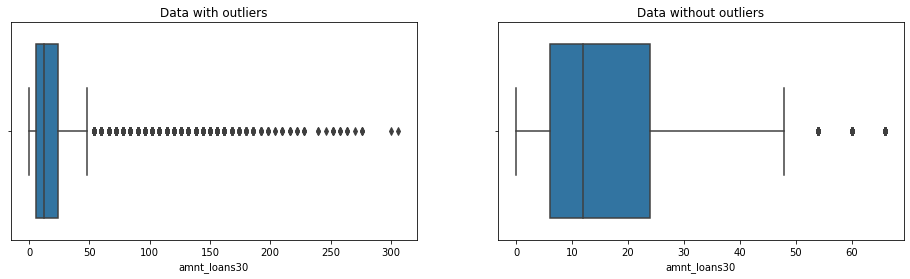

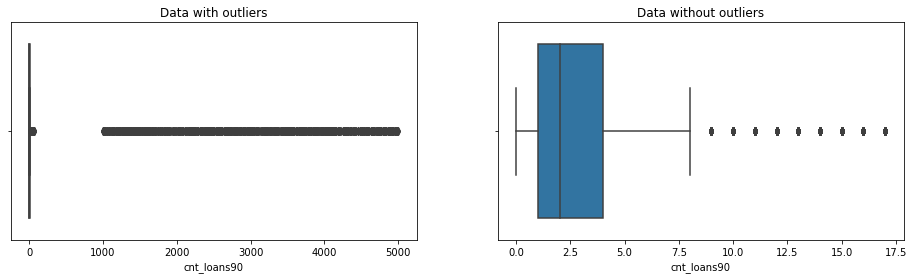

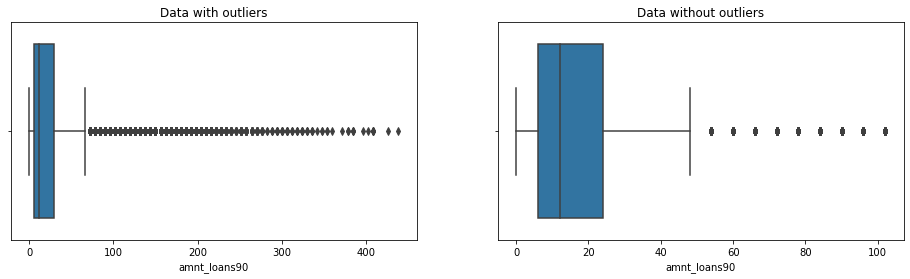

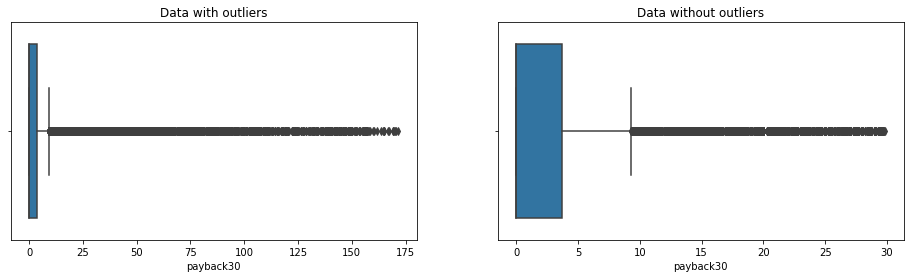

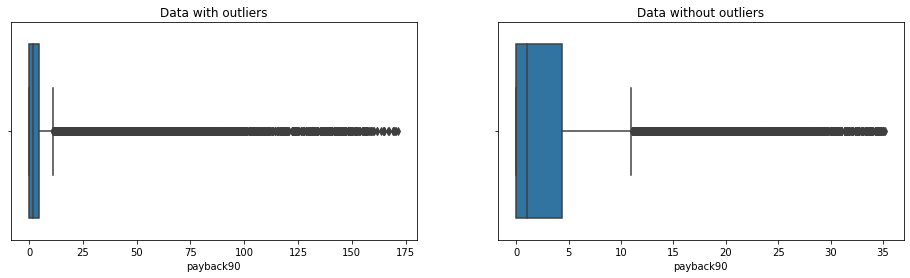

In [38]:
# before and after removing the outliers
for col in cols:
    fig = plt.figure(figsize=(16, 4))
    
    fig.add_subplot(121)
    sns.boxplot(df2[col])
    plt.title('Data with outliers')
    
    fig.add_subplot(122)
    sns.boxplot(df_drop[col])
    plt.title('Data without outliers')

In [39]:
# Checking the skewness 
df_drop.skew()

label                   -2.137698
aon                      0.956737
daily_decr30             1.951274
daily_decr90             2.062553
rental30                 2.177468
rental90                 2.218779
last_rech_date_ma        3.075067
last_rech_amt_ma         2.105901
cnt_ma_rech30            1.195127
fr_ma_rech30             2.002024
sumamnt_ma_rech30        1.643258
medianamnt_ma_rech30     2.307818
medianmarechprebal30    10.711546
cnt_ma_rech90            1.334891
fr_ma_rech90             1.976786
sumamnt_ma_rech90        1.709863
medianamnt_ma_rech90     2.347159
medianmarechprebal90     3.664429
cnt_loans30              1.481620
amnt_loans30             1.456102
cnt_loans90              1.724830
amnt_loans90             1.710214
payback30                2.644249
payback90                2.553795
dtype: float64

In [40]:
num_var = df_drop.select_dtypes(exclude = 'object')

In [41]:
# Treating the skewness using Sqrt Transformation
np.sqrt(df_drop).skew()

label                  -2.137698
aon                     0.337536
daily_decr30            0.817667
daily_decr90            0.886577
rental30                0.926019
rental90                0.946000
last_rech_date_ma       1.283042
last_rech_amt_ma        0.404045
cnt_ma_rech30          -0.098120
fr_ma_rech30            0.608563
sumamnt_ma_rech30       0.177037
medianamnt_ma_rech30    0.258225
medianmarechprebal30    1.756009
cnt_ma_rech90           0.086724
fr_ma_rech90            0.900871
sumamnt_ma_rech90       0.320052
medianamnt_ma_rech90    0.353555
medianmarechprebal90    1.391697
cnt_loans30             0.643003
amnt_loans30            0.624412
cnt_loans90             0.875756
amnt_loans90            0.863541
payback30               0.897780
payback90               0.807286
dtype: float64

In [42]:
# Finalysing the Sqrt Transformation
df_drop = np.sqrt(df_drop)

In [43]:
df_drop.isnull().sum()

label                      0
aon                     1412
daily_decr30            1748
daily_decr90            1748
rental30                4371
rental90                4599
last_rech_date_ma       1123
last_rech_amt_ma           0
cnt_ma_rech30              0
fr_ma_rech30               0
sumamnt_ma_rech30          0
medianamnt_ma_rech30       0
medianmarechprebal30    1372
cnt_ma_rech90              0
fr_ma_rech90               0
sumamnt_ma_rech90          0
medianamnt_ma_rech90       0
medianmarechprebal90    1428
cnt_loans30                0
amnt_loans30               0
cnt_loans90                0
amnt_loans90               0
payback30                  0
payback90                  0
dtype: int64

In [44]:
df_drop = df_drop.dropna()

In [45]:
df_drop.shape

(163388, 24)

In [46]:
cols = df_drop.columns

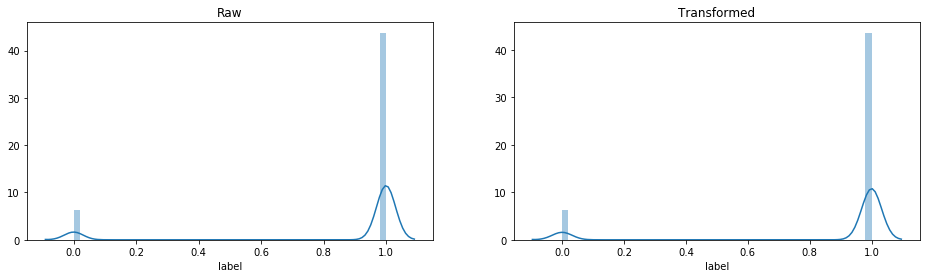

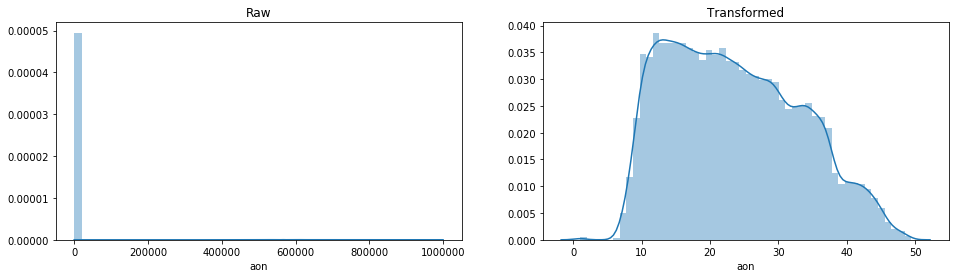

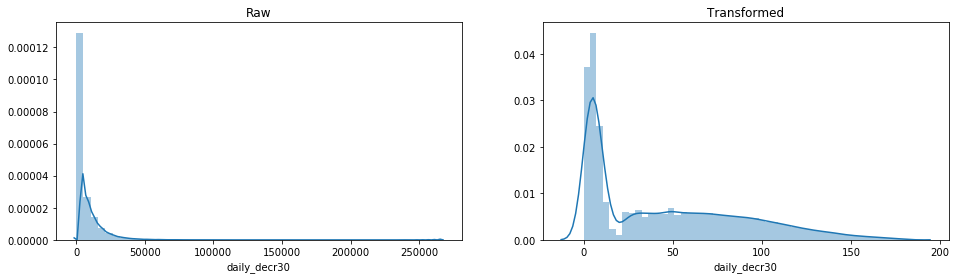

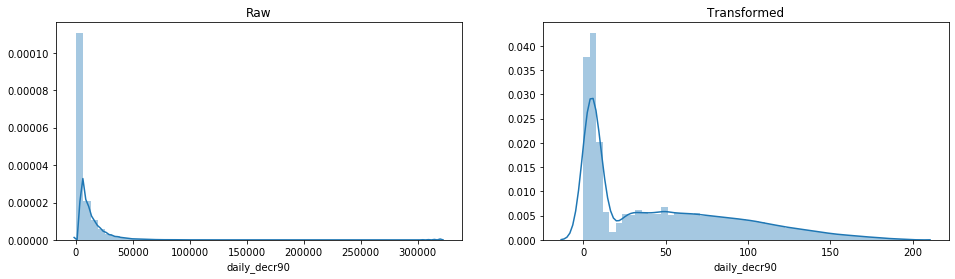

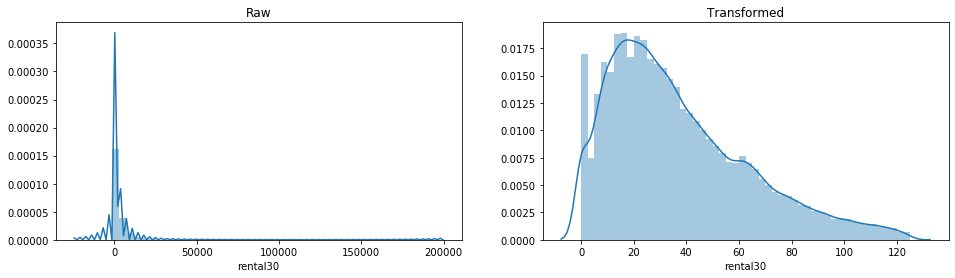

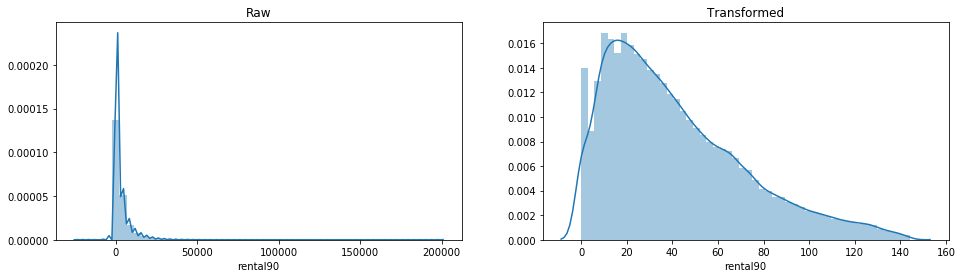

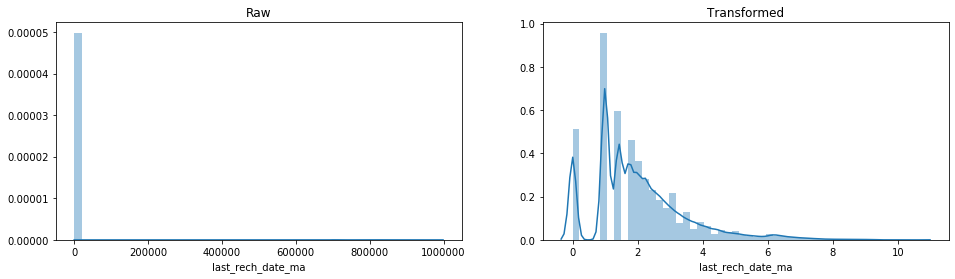

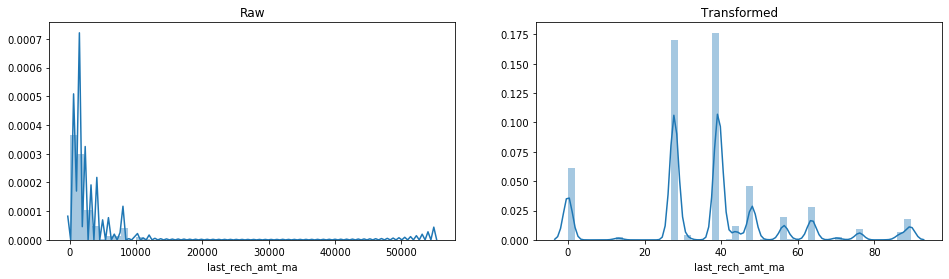

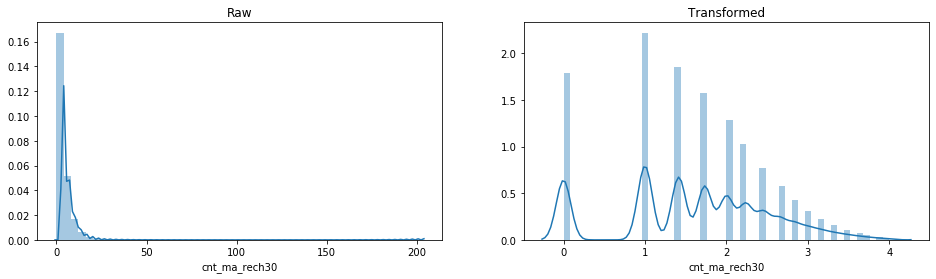

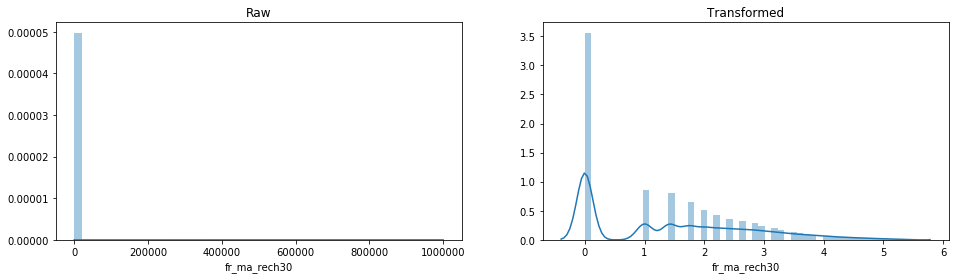

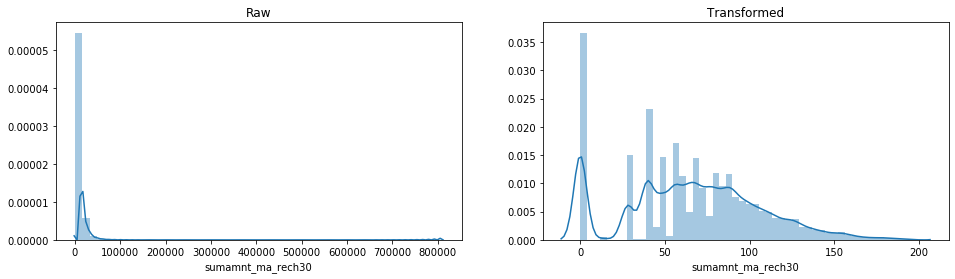

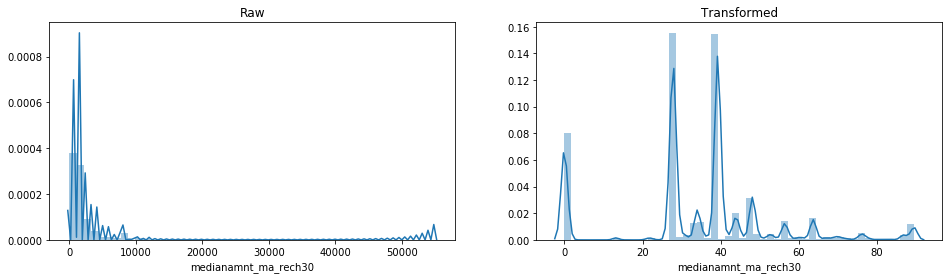

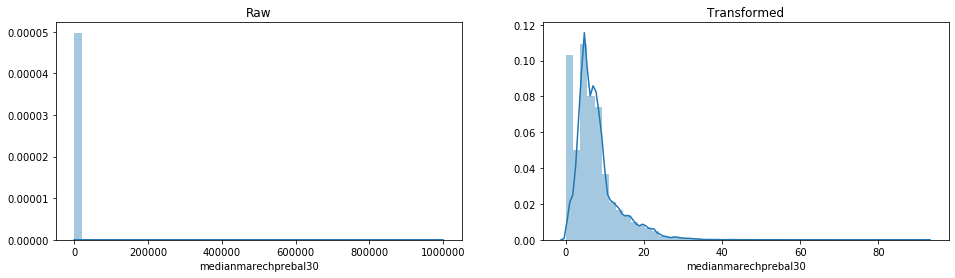

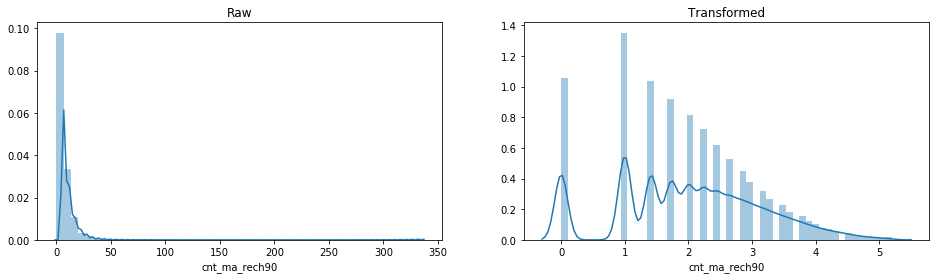

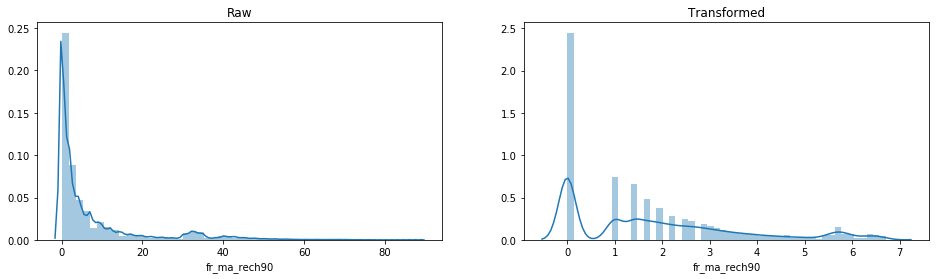

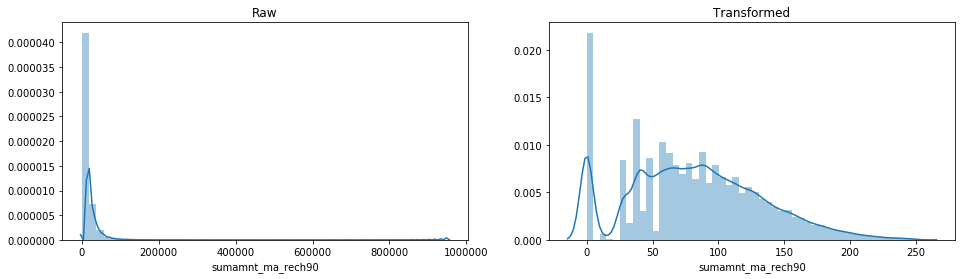

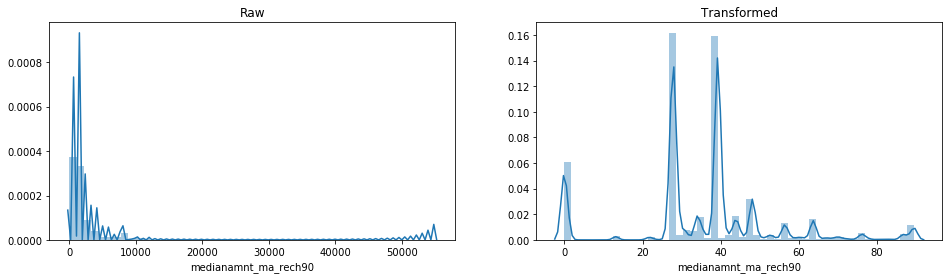

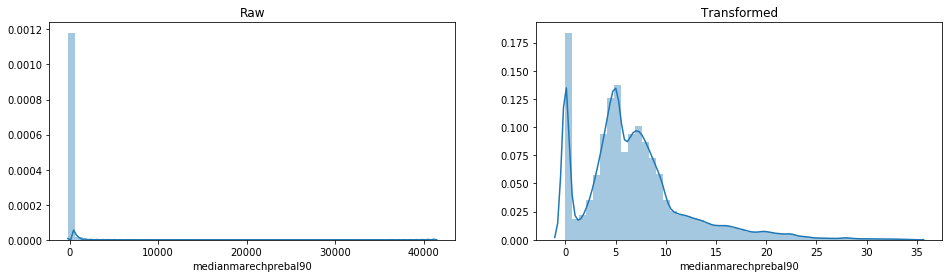

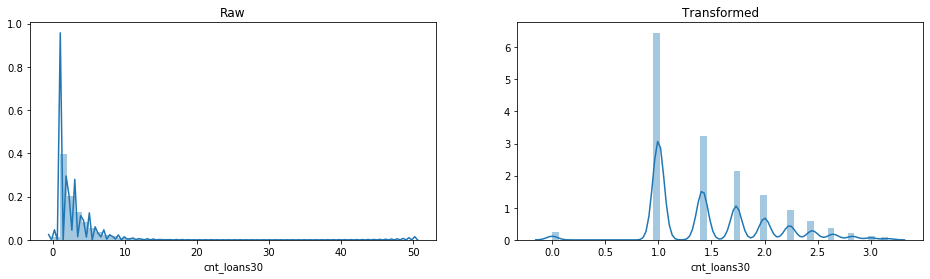

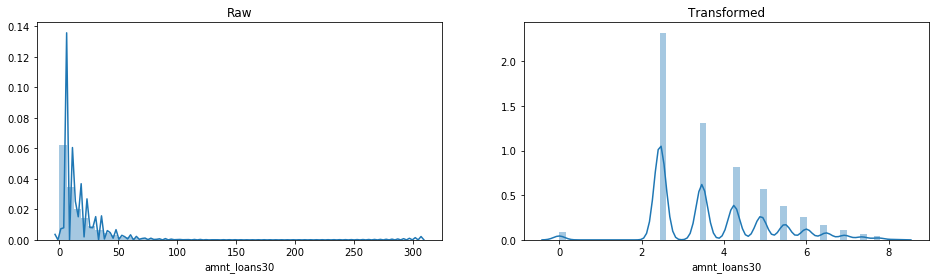

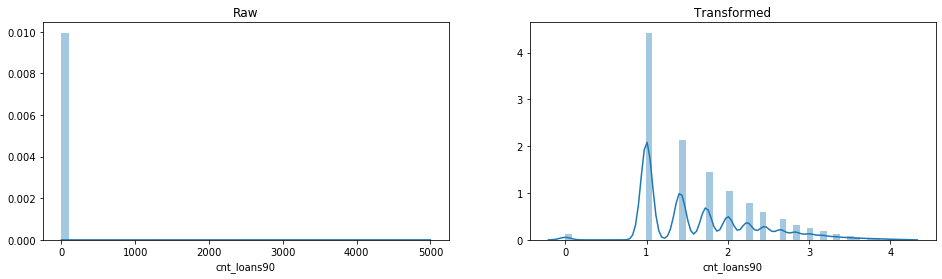

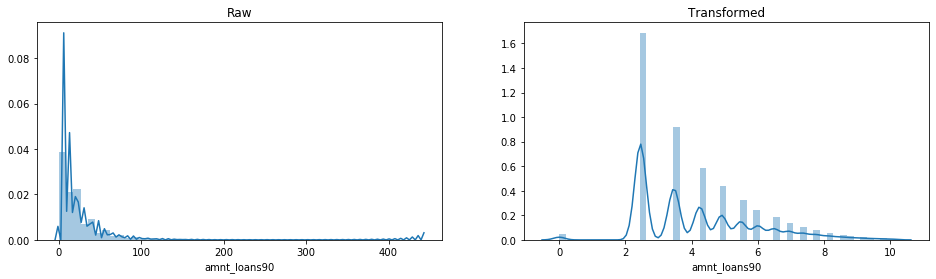

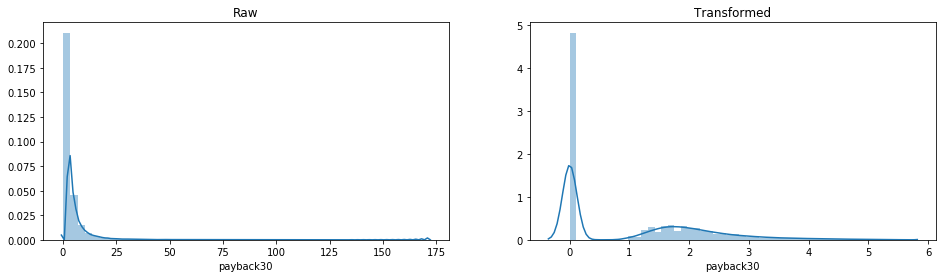

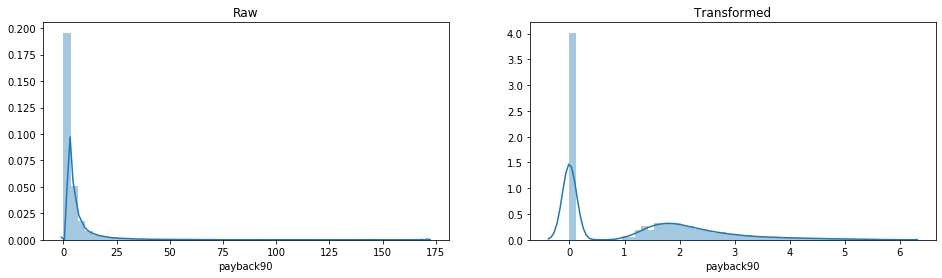

In [47]:
# before and after : skew transformation
for col in cols:
    fig = plt.figure(figsize=(16,4))
    
    fig.add_subplot(121)
    sns.distplot(df2[col])
    plt.title('Raw')
    fig.add_subplot(122)
    sns.distplot(df_drop[col])
    plt.title('Transformed')

In [48]:
# Splitting the target Variable
x = df_drop.drop('label',1)
y = df_drop['label']

In [49]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [50]:
#Split data into separate training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=0)
print('Shape of x_train = ', x_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of x_test = ', x_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of x_train =  (130710, 23)
Shape of y_train =  (130710,)
Shape of x_test =  (32678, 23)
Shape of y_test =  (32678,)


In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier

In [52]:
KNN=KNeighborsClassifier()
LR=LogisticRegression()
DT=DecisionTreeClassifier()
GNB=GaussianNB()
RFC=RandomForestClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()
ETC=ExtraTreesClassifier()

In [53]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

In [54]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [ ]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [ ]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
print(result.sort_values(by = 'Accuracy_score',ascending=True))

As we can see from above trials the best performance is given by RandomForestClassifier so it is the final model selected

In [ ]:
# SAVING THE BEST MODEL:
import joblib
joblib.dump(RFC,'loan.pkl')